# reference

https://www.kabuku.co.jp/developers/visualize_intermidiate_conv1d_output

# import library

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# createデータセット

In [22]:
def mySin(t, period=100):
    """
    時刻t, 周期period
    """
    return np.sin(2.0 * np.pi * t/period)

# Add Noise
def toy_func(tStart=0, tStop=100, tStep=1, noiseAmpl=0.05):
    """
    T : sin波の周期
    ampl : ノイズ振幅調整
    """
    t = np.arange(start=tStart, stop=tStop, step=tStep)
    noise = np.random.randn(t.shape[0])  # mean=0, standard_deviation=1
    return (t, mySin(t=t, period=100) + noiseAmpl * noise)

In [23]:
windowsize = 100  # 周期と同じくとる
predictsize = 1
sample_data_size = 10000
wave_size = sample_data_size
trainsize = int(10000*0.8)

In [24]:
t, sample_wave = toy_func(tStop=sample_data_size, noiseAmpl=0)

<Axes: >

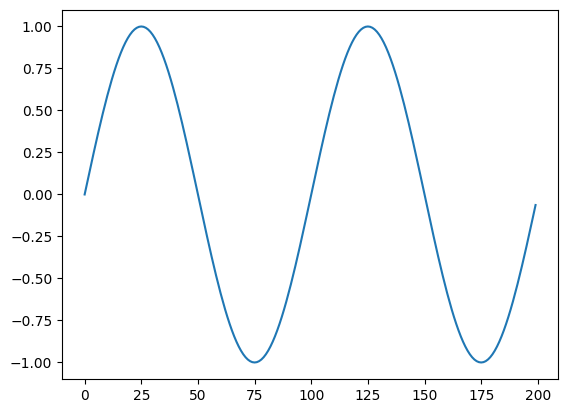

In [25]:
sns.lineplot(sample_wave[:200])

In [30]:
#----------------------------------------
# Parameters
#----------------------------------------
windowsize = 100  # 周期と同じくとる
predictsize = 1
sample_data_size = 10000
wave_size = sample_data_size
trainsize = int(10000*0.8)

#----------------------------------------
# Sample Wave
#----------------------------------------
t, sample_wave = toy_func(tStop=sample_data_size, noiseAmpl=0)
print(sample_wave.shape)

(10000,)


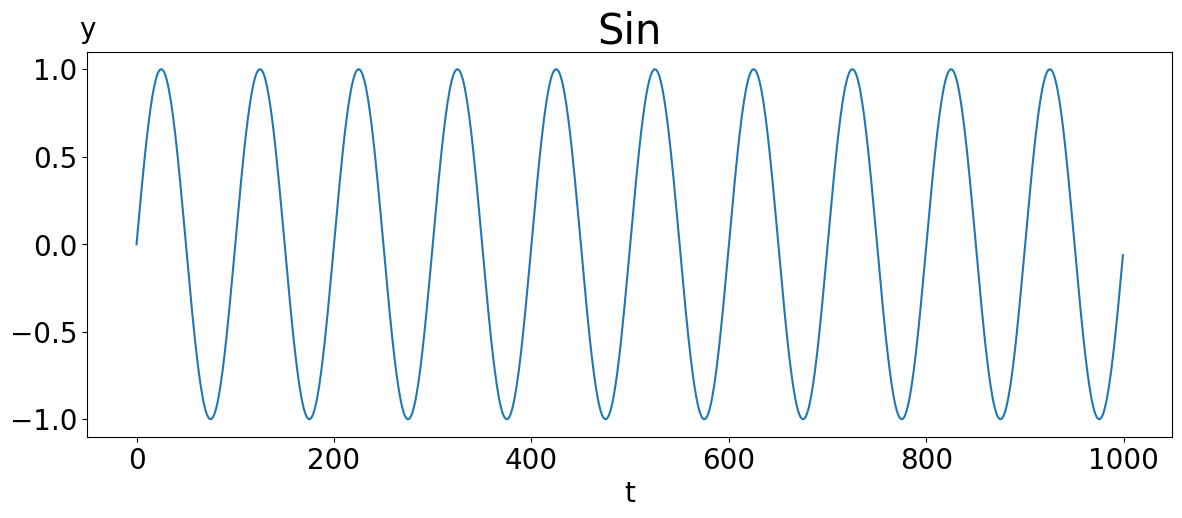

In [31]:
#----------------------------------------
# plot sample wave
#----------------------------------------

fig = plt.figure(figsize=(14,5))  # (width, height)
ax = fig.add_subplot(1,1,1)
ax.plot(t[:1000], sample_wave[:1000])

title = "Sin"
ax.set_title(label=title, fontsize=30)
ax.set_xlabel(xlabel="t", fontsize=20)
ax.set_ylabel(ylabel="y", fontsize=20, rotation=0)
ax.yaxis.set_label_coords(x=0.0, y=1.02)
ax.tick_params(labelsize=20)

plt.show()

In [32]:
#----------------------------------------
# create input data
#----------------------------------------
input_data  = np.empty(shape=(0, windowsize))
output_data = np.empty(shape=(0, predictsize))
print(input_data.shape)
print(output_data.shape)
for i in range( sample_wave.shape[0] - (windowsize + predictsize) + 1 ):
    input_data = np.append(arr   =input_data,
                           values=sample_wave[i:(i+windowsize)].reshape(1, -1),
                           axis  =0)
    output_data = np.append(arr   =output_data,
                            values=sample_wave[(i+windowsize):(i+windowsize+predictsize)].reshape(1, -1),
                            axis  =0)
print("input_data.shape  : ", input_data.shape)
print("output_data.shape : ", output_data.shape)
#--------------------
# Kerasのモデルに入力できる形にするためにreshapeして次元を足す
#--------------------
input_data = input_data.reshape((-1, windowsize, 1))
output_data = output_data.reshape((-1, predictsize,))
print("input_data.shape  : ", input_data.shape)
print("output_data.shape : ", output_data.shape)

(0, 100)
(0, 1)
input_data.shape  :  (9900, 100)
output_data.shape :  (9900, 1)
input_data.shape  :  (9900, 100, 1)
output_data.shape :  (9900, 1)


In [36]:
output_data

array([[-2.44929360e-16],
       [ 6.27905195e-02],
       [ 1.25333234e-01],
       ...,
       [-1.87381315e-01],
       [-1.25333234e-01],
       [-6.27905195e-02]])

In [37]:
input_data.shape

(9900, 100, 1)